Basic Imports

In [2]:
import pandas
import marketData
import Orders
import Plot
import Indicators

Adding indicators

In [4]:
#df = marketData.getPrices("BTCUSDT", "1m", 78)
df = pandas.read_csv("Data/BTCUSDT1m.csv")
df = Indicators.Stochastic(df)
df = Indicators.ADX(df)
df = df.iloc[27:]
df.to_csv("Data/BTCUSDT1mQ.csv")
print("Done!")


Done!


Getting order book

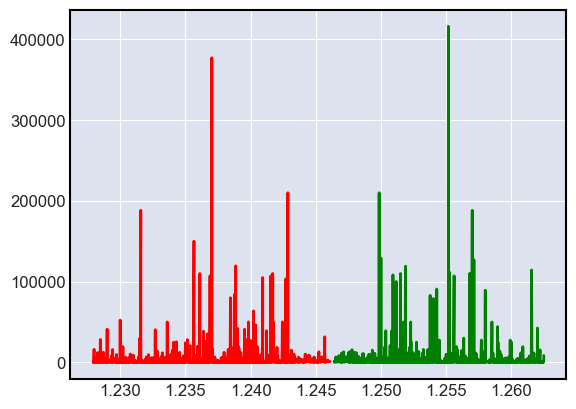

In [28]:
df = Orders.OrderBook("ADAUSDT")
Plot.plotSR(df[0], df[1])

Getting historical data and computing indicators

In [3]:
import time

#Time to nanoseconds
pair = "BTCUSDT"
timeframe = "1m"
current = time.time() * 1000
current = round(current)

#Time step for requests
block = 500*60*1000
current -= block
amount = 800

#Populating latest
df = marketData.getPrices(pair, timeframe, 500)
for i in range(0, amount):
    print(str((i+1 / amount)*100)+"%")
    df = df.append(marketData.getHistorical(pair, timeframe, current - block, current))
    current -= block

df = df.sort_index()
df.to_csv("Data/"+pair+timeframe+".csv")

print("Done fetching")


df = pandas.read_csv("Data/"+pair+timeframe+".csv")
df = Indicators.Stochastic(df)
df = Indicators.ADX(df)
df = df.iloc[27:]
df.to_csv("Data/"+pair+timeframe+"Q.csv")

print("Done adding indicators")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Using Keras

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras


dataset = pd.read_csv("Data/dataset.csv").apply(pd.to_numeric)
labels = dataset.pop("Position").to_numpy()
dataset.pop("0")
dataset = dataset.to_numpy()
print(dataset.shape)



model = tf.keras.models.Sequential([
    keras.layers.Dense(400, activation="sigmoid"),
    keras.layers.Dense(600, activation="sigmoid"),
    #tf.keras.layers.Dropout(0.2),
    keras.layers.Dense(600),
    keras.layers.Dense(400),
    keras.layers.Dense(100),
    keras.layers.Dense(3, activation="softmax")
])

print("Compiling model")
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#Checkpointing
checkpoint_path = "checkpoints/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True)
#model.load_weights(checkpoint_path)

print("Fitting")
model.fit(dataset, labels, epochs=10, callbacks=[cp_callback])


(250402, 400)
Compiling model
Fitting
Epoch 1/10
250402/250402 [==============================] - 18s 73us/sample - loss: 1342568626.9889 - acc: 0.3337

preparing as a single csv

In [5]:
import pandas as pd
features = pd.read_csv("Data/values.csv")
labels = pd.read_csv("Data/labels.csv")
labels.columns=["Position"]

df = pd.concat([features,labels], axis=1)
print(df)
df.to_csv("Data/dataset.csv")
print("Done!")

               0         1         2         3         4         5         6  \
0      -0.000992 -0.006654  0.007761 -0.002249 -0.066016 -0.008855 -0.027514   
1      -0.003137 -0.001783 -0.010328 -0.009300  0.020124  0.023837 -0.029760   
2      -0.009249 -0.014837 -0.023787 -0.023063  0.011576  0.232012  0.082331   
3      -0.023157 -0.033618 -0.028970 -0.032263 -0.085455  0.317489  0.191113   
4      -0.031385 -0.031829 -0.109222 -0.067195  0.089147  0.295145  0.281549   
...          ...       ...       ...       ...       ...       ...       ...   
400411  0.069923  0.061862  0.059336  0.061164 -0.096820  0.408764  0.131888   
400412  0.062071  0.037267  0.054498  0.044827 -0.465579  0.380196  0.302185   
400413  0.044827  0.058605  0.046009  0.058679  0.003787  0.421004  0.403321   
400414  0.058679  0.030224  0.043549  0.032288 -0.267977  0.342653  0.381284   
400415  0.032528  0.039483  0.053012  0.043509 -0.237707  0.181620  0.315092   

               7         8         9  .

Bot testing

In [ ]:
import bot
bot = bot.bot("BTCUSDT", "model", 20)

Bot started
Bot scheduled for 20m
2021-03-14 23:40:00.051798
Neutral: 0.9980216026306152 Long: 3.307272709207609e-05 Short: 0.0019453266868367791
2021-03-14 23:41:00.643725
Neutral: 0.8211179971694946 Long: 0.01469317078590393 Short: 0.16418878734111786
2021-03-14 23:42:00.153122
Neutral: 0.8075036406517029 Long: 0.016562649980187416 Short: 0.17593367397785187
2021-03-14 23:43:00.566838
Neutral: 0.704868495464325 Long: 0.03513544425368309 Short: 0.2599961459636688
2021-03-14 23:44:00.040590
Neutral: 0.9922482967376709 Long: 0.00016325134492944926 Short: 0.007588520180433989
2021-03-14 23:45:00.467872
Neutral: 0.9790374040603638 Long: 0.0006374117801897228 Short: 0.020325183868408203


testing timer

In [8]:
from datetime import datetime
import time
import sched

scheduler = sched.scheduler(time.time, time.sleep)

def print_event():
    print ("weed")

scheduler.enter(2, 1, print_event)
scheduler.enter(3, 1, print_event)

scheduler.run()


weed
weed
